# Visualize ReLU Network Function

A ReLU deep learning network is a representation of a function from its input to its output.

More precisely it is a "piecewise linear" function. In this notebook we explore this notion and try to get an understanding through simple examples and visualizations.

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

plt.style.use("dark_background")

## 1D Dense with a single neuron

This is the simplest possible model: 1 input neuron and 1 output neuron with a ReLU activation in between.

In [27]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=(1,)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


As we can see below the function that this network represents is just a scaled ReLU. A piecewise linear function with a single "inflexion point".

In [28]:
x_input = np.linspace(-1, 1, 100)
x_predict = model.predict(x_input)

In [29]:
plt.plot(x_input, x_predict)
plt.xlabel("input values")
plt.ylabel("output values")
plt.title("Function that this network represents")
None

## 1D Dense with Hidden Layer

In [148]:
def scalar_mlp(layer_sizes, bias_initializer):
    """ Creates a feedforward MLP that outputs a single value.
    
    Args:
        layer_sizes (int list): Number of neurons in each layer.
            Note that the first element on this list gives the input size.
        bias_initializer (string): tf.keras initializer
        
    Returns:
        A keras model.
    """
    assert len(layer_sizes)>1, "Network must contain at least a hidden layer"
    
    hidden_layers = [
        keras.layers.Dense(n, bias_initializer=bias_initializer, activation="relu") 
        for n in layer_sizes[1:]]
    model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=(layer_sizes[0],))] + hidden_layers +
        [keras.layers.Dense(1)])
    return model

In [149]:
keras.backend.clear_session()
model = scalar_mlp([1, 2], 'zeros')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


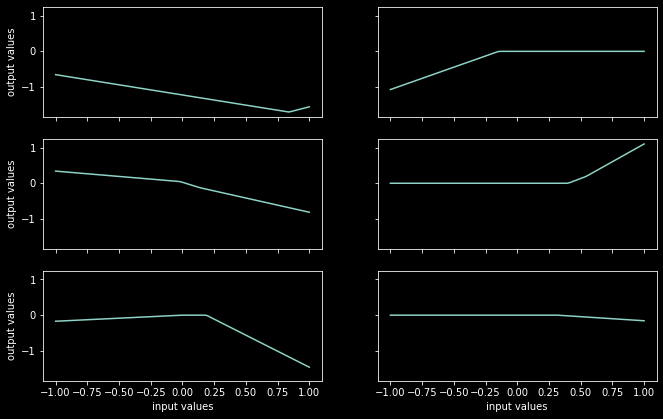

In [151]:
_, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(11, 11/1.6))
x_input = np.linspace(-1, 1, 100)
# for each row
for i in range(3):
    # for each column
    for j in range(2):
        # create a new model
        model = scalar_mlp([1, 2], 'glorot_normal')
        # apply it to the input
        x_predict = model.predict(x_input)
        # plot the results
        ax[i][j].plot(x_input, x_predict)
        ax[2][j].set_xlabel("input values")
        ax[i][0].set_ylabel("output values")


Here with 5 hidden neurons: we can see many more breaks, the piecewise approximation becomes more complex

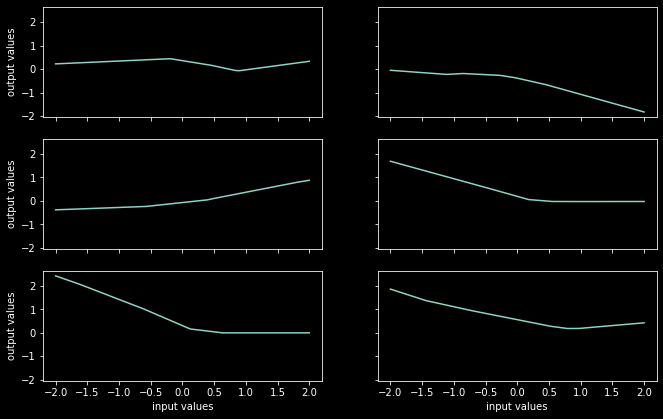

In [152]:
_, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(11, 11/1.6))
x_input = np.linspace(-2, 2, 200)
# for each row
for i in range(3):
    # for each column
    for j in range(2):
        # create a new model
        model = scalar_mlp([1, 5], 'glorot_uniform')
        # apply it to the input
        x_predict = model.predict(x_input)
        # plot the results
        ax[i][j].plot(x_input, x_predict)
        ax[2][j].set_xlabel("input values")
        ax[i][0].set_ylabel("output values")

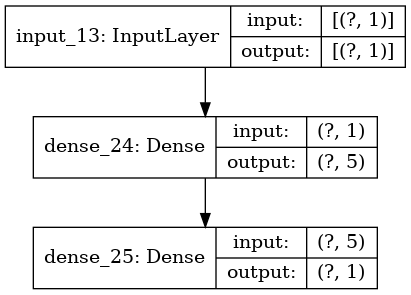

In [109]:
keras.utils.plot_model(model, show_shapes=True)

## 2 Hidden Layers

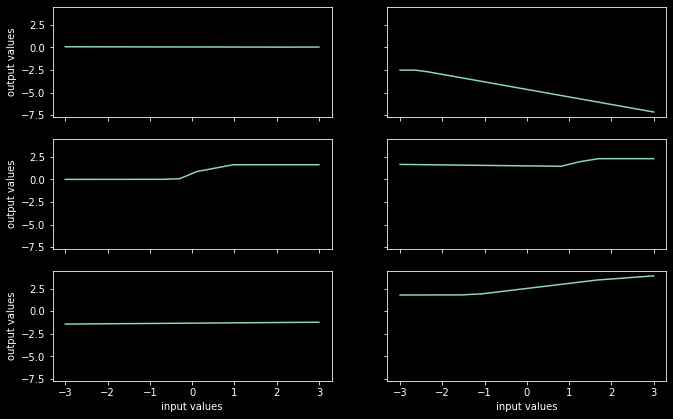

In [154]:
_, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(11, 11/1.6))
x_input = np.linspace(-3, 3, 300)
# for each row
for i in range(3):
    # for each column
    for j in range(2):
        # create a new model
        model = scalar_mlp([1, 2, 2, 2], 'ones')
        # apply it to the input
        x_predict = model.predict(x_input)
        # plot the results
        ax[i][j].plot(x_input, x_predict)
        ax[2][j].set_xlabel("input values")
        ax[i][0].set_ylabel("output values")

In [157]:
x = tf.constant(np.linspace(-3, 3, 300), shape=(300,1), dtype='float32')
with tf.GradientTape() as tape:
    tape.watch(x)
    y = model(x)
dy_dx = tape.gradient(y, x)

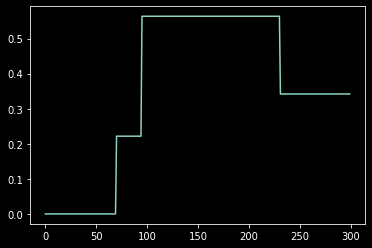

In [158]:
plt.plot(dy_dx)

## Functions on the Plane $\mathbb{R}^2 \rightarrow \mathbb{R}$

In [240]:
x = np.arange(-10, 10, 0.2, dtype="float32")
y = np.arange(-10, 10, 0.2, dtype="float32")
xx, yy = np.meshgrid(x, y)

In [318]:
model = scalar_mlp([2, 1], 'ones')
x_input = np.dstack([xx, yy]).reshape(-1, 2)
z = model.predict(x_input)
plt.contourf(x,y,z.reshape(100, 100))

In [317]:
model = scalar_mlp([2, 10], 'ones')
x_input = np.dstack([xx, yy]).reshape(-1, 2)
z = model.predict(x_input)
plt.contourf(x,y,z.reshape(100, 100))

Here we show the gradient

In [314]:
keras.backend.clear_session()
model = scalar_mlp([2, 1000, 1000, 1000], 'zeros')
x_input = tf.convert_to_tensor(np.dstack([xx, yy]).reshape(-1, 2))
with tf.GradientTape() as tape:
    tape.watch(x_input)
    z = model(x_input)
gradient = tape.gradient(z, x_input)
plt.contourf(x,y,gradient.numpy()[:, 1].reshape(100, 100))